<IPython.core.display.Javascript object>


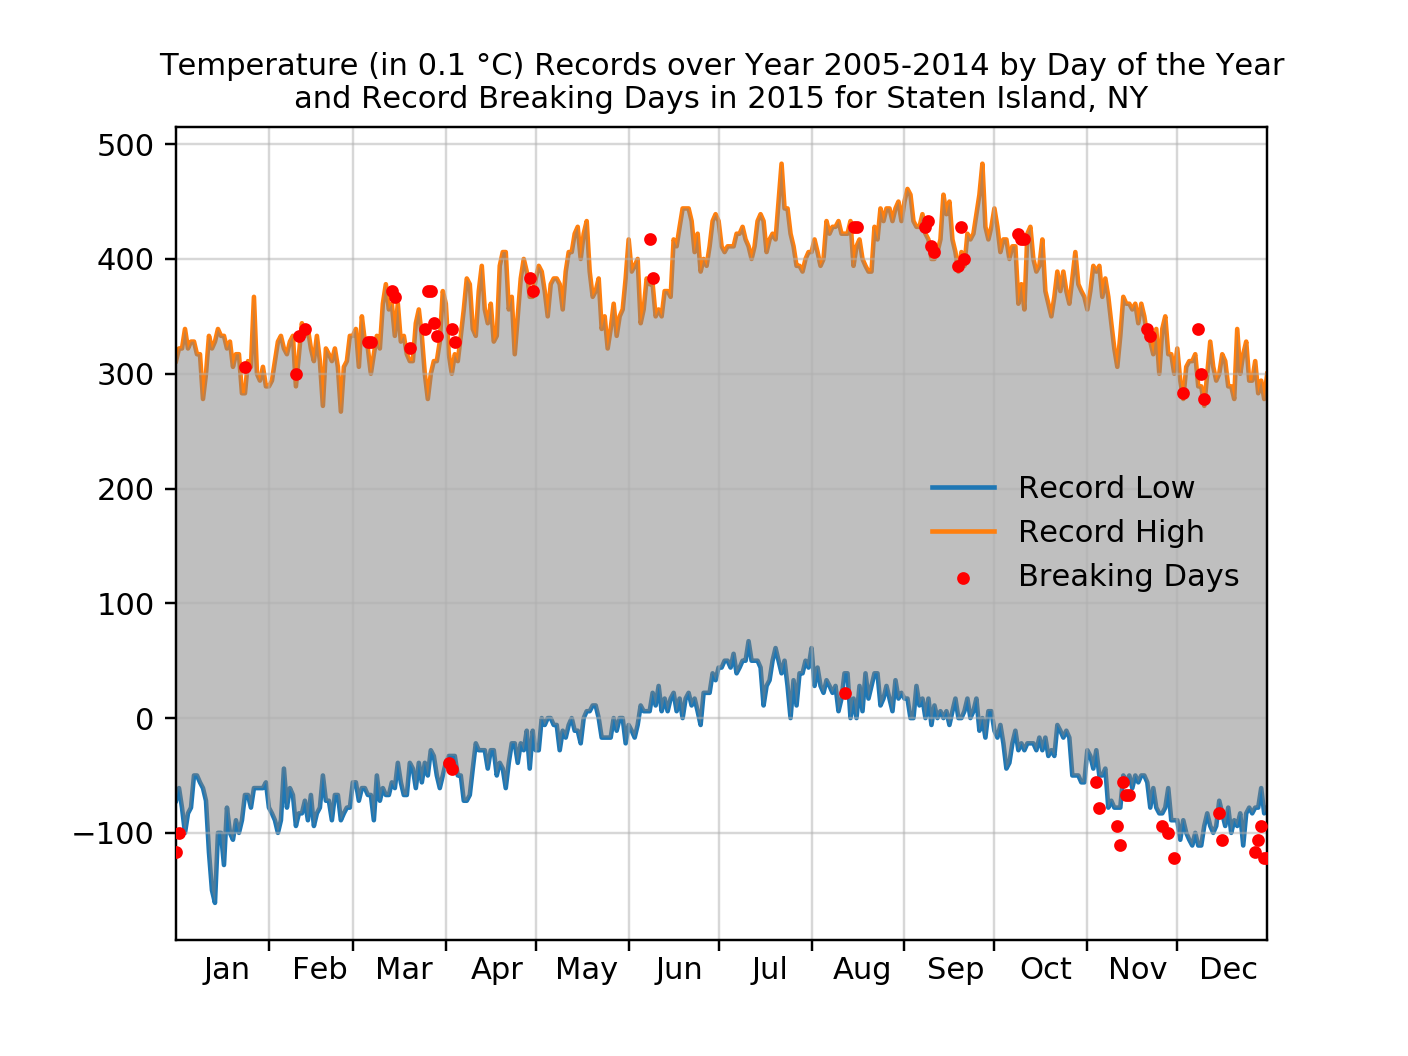

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

def weather_records_graph_coursera():
    df = pd.read_csv('../21f22d18c15db96f2a6ce96fdf640ced045b79a0fcb2ceacf61668e3.csv')
    df['Day'] = df.Date.str[5:]
    df_2015 = df[df.Date.str.startswith('2015')]
    record_2015 = df_2015.groupby('Day').Data_Value.agg((min, max))
    df_before = df[[not i for i in df.Date.str.startswith('2015')]]
    record_before = df_before.groupby('Day').Data_Value.agg((min, max))
    record = record_2015.merge(record_before, left_index=True, right_index=True, how='left')
    record.reset_index(inplace=True)
    low = record.min_y
    high = record.max_y
    breaking_points_min = record.min_x[record.min_x < record.min_y]
    breaking_points_max = record.max_x[record.max_x > record.max_y]
    
    plt.figure()
    plt.plot(low.values, zorder=0)
    plt.plot(high.values, zorder=0)
    plt.scatter(breaking_points_min.index, breaking_points_min.values, c='r', s=10, zorder=10)
    plt.scatter(breaking_points_max.index, breaking_points_max.values, c='r', s=10, zorder=10)
    
    #labels of xticks
    locs = np.asarray([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334])
    labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    plt.xticks(locs[1:], [])
    ax=plt.gca()
    ax.xaxis.set_minor_locator(ticker.FixedLocator(locs+17))
    ax.xaxis.set_minor_formatter(ticker.FixedFormatter(labels))
    plt.tick_params(axis="x", which="minor", direction="out", top=0, bottom=0, labelbottom=1, labeltop=0)

    ax.set_xlim([0,364])
    ax.fill_between(low.index, low, high, facecolor='gray', alpha=0.5)
    
    plt.title('Temperature (in 0.1 \u00b0C) Records over Year 2005-2014 by Day of the Year\nand Record Breaking Days in 2015 for Staten Island, NY', size=10)
    plt.legend(['Record Low', 'Record High', 'Breaking Days'], frameon=False)
    plt.grid(alpha=0.5, zorder=-5)
    plt.show()
#     plt.savefig('weather_record_2.png')
    
weather_records_graph_coursera()